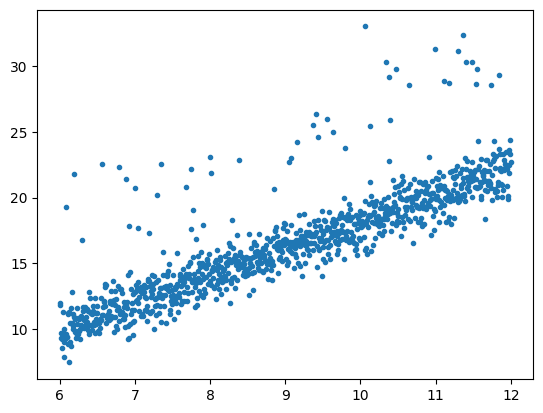

4.448081084793019
1.2330319678476873
0.7384628565789937


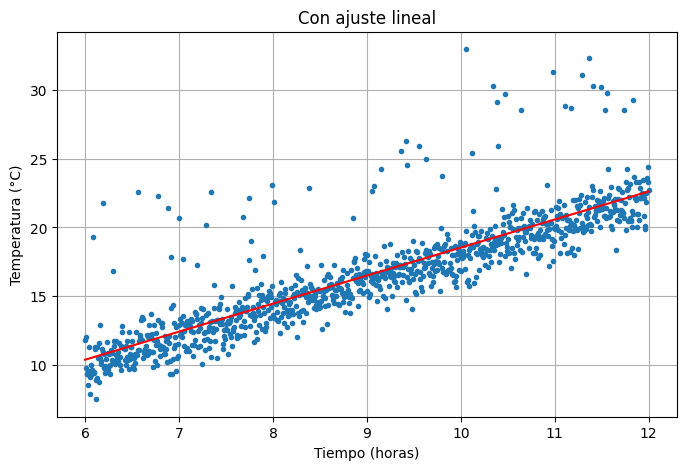

In [44]:
# Equipo Alpha Álvaro, Juan, Pablo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Este modelo asume que hay una relación lineal entre la variable dependiente
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# leer los datos
datos = pd.read_csv("datos.csv",header = 0)
X=datos["Time (hours)"].values.reshape(-1, 1)  # Convertir a matriz 2D
y=datos["Temperature (°C)"].values

# graficar los dados
plt.plot(X,y, linestyle='None',marker=('.'))
plt.show()

"""
Ajustar a una línea recta, graficar, dar las métricas que evalúen el resultado 
(r2 de bondad del ajuste, histograma de los residuales, error medio cuadrático,
analizar la varianza por tramos de los residuales (5 tramos))
"""
# Ajustar a una linea recta
modelo = LinearRegression()
modelo.fit(X, y)  # calcular los coeficientes que definen la mejor línea recta que ajusta los datos
y_pred = modelo.predict(X)  # Predecir valores

mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(mse)
print(mae)
print(r2)
# Mostrar la gráfica con la linea
plt.figure(figsize=(8, 5))
plt.plot(X, y, linestyle='None', marker='.', label='Datos originales')
plt.plot(X, y_pred, color='red', label='Ajuste lineal')
plt.title('Con ajuste lineal')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()



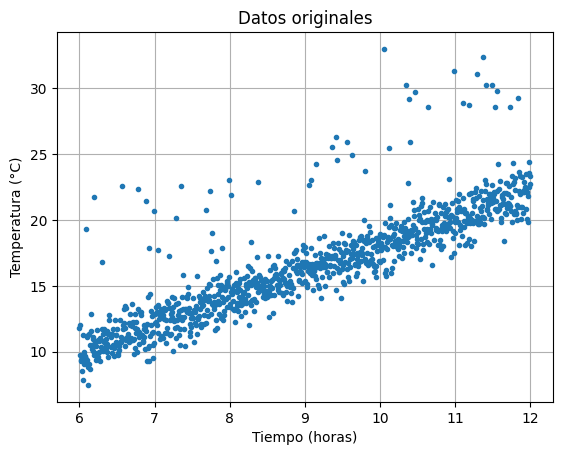

MSE: 4.448081084793019
MAE: 1.2330319678476873
R^2: 0.7384628565789937


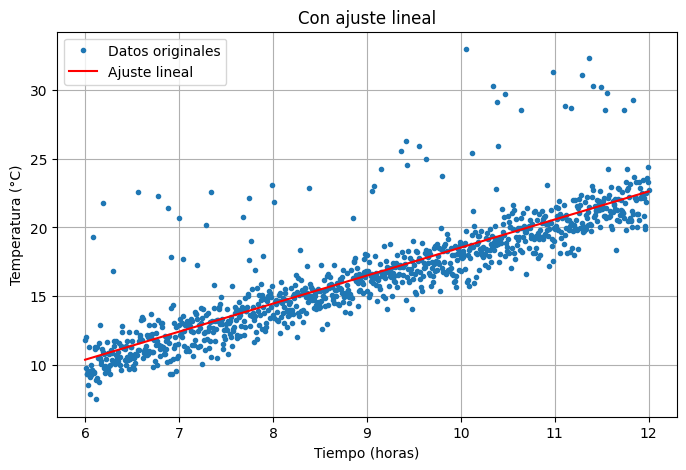

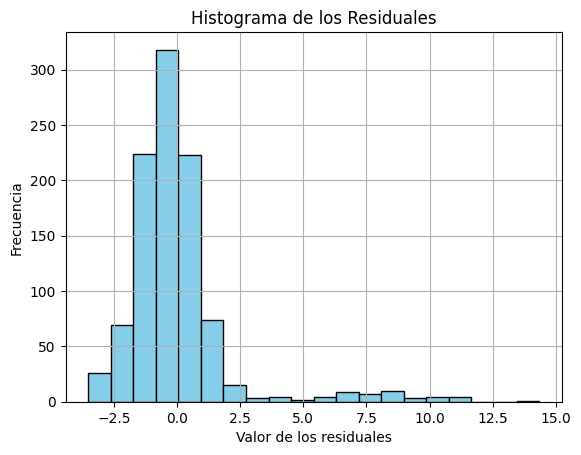

Varianza de los residuales en el tramo 1: 4.605239575969613
Varianza de los residuales en el tramo 2: 3.740331957818941
Varianza de los residuales en el tramo 3: 3.1670636087576636
Varianza de los residuales en el tramo 4: 5.229348840851239
Varianza de los residuales en el tramo 5: 5.479066088023803
Datos originales: 1000
Datos sin outliers: 944


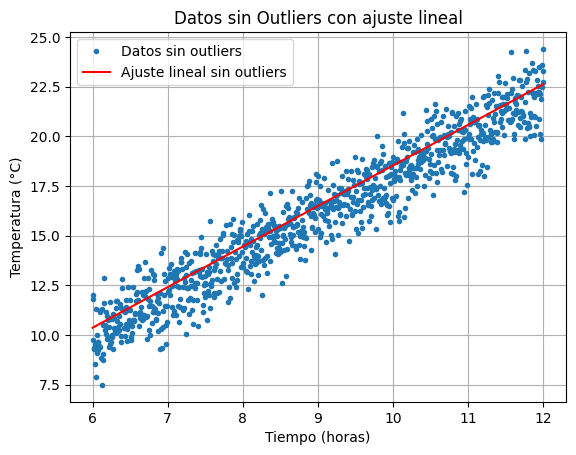

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Leer los datos
datos = pd.read_csv("datos.csv", header=0)
X = datos["Time (hours)"].values.reshape(-1, 1)  # Convertir a matriz 2D
y = datos["Temperature (°C)"].values

# Graficar los datos originales
plt.plot(X, y, linestyle='None', marker='.', label='Datos originales')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Temperatura (°C)')
plt.title('Datos originales')
plt.grid(True)
plt.show()

# Ajustar a una línea recta
modelo = LinearRegression()
modelo.fit(X, y)  # Calcular los coeficientes de la mejor línea recta
y_pred = modelo.predict(X)  # Predecir los valores

# Calcular métricas
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

# Mostrar la gráfica con la línea ajustada
plt.figure(figsize=(8, 5))
plt.plot(X, y, linestyle='None', marker='.', label='Datos originales')
plt.plot(X, y_pred, color='red', label='Ajuste lineal')
plt.title('Con ajuste lineal')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el histograma de los residuales
residuales = y - y_pred
plt.hist(residuales, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de los Residuales')
plt.xlabel('Valor de los residuales')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Análisis de la varianza de los residuales por tramos
# Dividir los datos en 5 tramos según el tiempo
n_tramos = 5
tramos = np.array_split(X, n_tramos)

# Calcular la varianza de los residuales en cada tramo
varianzas = []
for tramo in tramos:
    # Obtener los índices de los elementos del tramo
    indices_tramo = np.where(np.isin(X, tramo))[0]
    
    # Extraer los residuales correspondientes a estos índices
    residuales_tramo = residuales[indices_tramo]
    
    # Calcular la varianza en el tramo
    varianzas.append(np.var(residuales_tramo))

# Mostrar las varianzas por tramo
for i, varianza in enumerate(varianzas):
    print(f'Varianza de los residuales en el tramo {i+1}: {varianza}')


# Encontrar los límites intercuartílicos (IQR) para eliminar outliers
Q1 = np.percentile(residuales, 25)
Q3 = np.percentile(residuales, 75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminar los outliers
outliers = (residuales < limite_inferior) | (residuales > limite_superior)
datos_sin_outliers = datos[~outliers]

# Mostrar los datos sin outliers
print(f'Datos originales: {len(datos)}')
print(f'Datos sin outliers: {len(datos_sin_outliers)}')

# Graficar los datos sin outliers
X_sin_outliers = datos_sin_outliers["Time (hours)"].values.reshape(-1, 1)
y_sin_outliers = datos_sin_outliers["Temperature (°C)"].values

plt.plot(X_sin_outliers, y_sin_outliers, linestyle='None', marker='.', label='Datos sin outliers')
plt.plot(X_sin_outliers, modelo.predict(X_sin_outliers), color='red', label='Ajuste lineal sin outliers')
plt.title('Datos sin Outliers con ajuste lineal')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()
